## Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [15]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = "SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = "SpamData/03_Testing/prob-ham.txt"
TOKEN_ALL_PROB_FILE = "SpamData/03_Testing/prob-all-tokens.txt"

TEST_FEATURE_MATRIX = "SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = "SpamData/03_Testing/test-target.txt"

## Load the Data

In [16]:
x_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter= " ")
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter= " ")
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter= " ")
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter= " ")
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter= " ")

## Calculating joint Probability 

In [17]:
x_test.shape

(1724, 2500)

In [18]:
prob_token_spam.shape

(2500,)

In [19]:
print("Shape of the dot product: ", x_test.dot(prob_token_spam).shape)

Shape of the dot product:  (1724,)


## Set the Prior

$ P(Spam \, | \, X)= \frac{P(X \, | \, Spam \,)\, P(Spam)}{P(X)} $

In [20]:
PROB_SPAM = 0.3116

In [21]:
np.log(prob_token_spam)

array([ -4.36276793,  -5.06972204,  -4.47128939, ...,  -9.09408117,
       -10.37501502,  -8.76557711])

## Joint Probability in Log Format

In [22]:
joint_log_spam = x_test.dot(np.log(prob_token_spam) - np.log(prob_all_token) + np.log(PROB_SPAM))

## Set the Prior

$ P(Ham \, | \, X)= \frac{P(X \, | \, Ham \,)\, P(Ham)}{P(X)} $

In [23]:
np.log(prob_token_ham)

array([ -3.82669698,  -4.75735833,  -5.50757071, ..., -10.35736634,
        -8.66569033, -10.91698212])

In [24]:
joint_log_ham = x_test.dot(np.log(prob_token_ham) - np.log(prob_all_token) + np.log(1-PROB_SPAM))

In [25]:
joint_log_ham.size

1724

## Making Prediction

#### Check for Higher Joint Probability

$ P(Spam \, | \, X) \, < \, P(Ham \, | \, X) $

OR

$ P(Spam \, | \, X) \, > \, P(Ham \, | \, X) $

In [26]:
prediction = joint_log_spam > joint_log_ham

In [28]:
prediction[-5:]

array([False, False, False, False, False])

#### Simplify

In [29]:
joint_log_spam = x_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = x_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

## Metrics and Evaluation

#### Accuracy

In [35]:
correct_docs = (y_test == prediction).sum()
print("Docs classified correctly:  ", correct_docs)
numdocs_wrong = x_test.shape[0]- correct_doc
print("Docs classified incorrectly: ", numdocs_wrong)


Docs classified correctly:   1390
Docs classified incorrectly:  334


In [36]:
correct_doc / len(x_test)

0.8062645011600929

In [38]:
fraction_wrong = numdocs_wrong/len(x_test)
print("Fraction classified incorrectly is {:.2%}".format(fraction_wrong))

Fraction classified incorrectly is 19.37%


## Visualising the Results

In [49]:
yaxis_label = "P(X | Spam)"
xaxis_label = "P(Y | Ham)"

linedata = np.linspace(start = -14000, stop= 1, num = 1000)

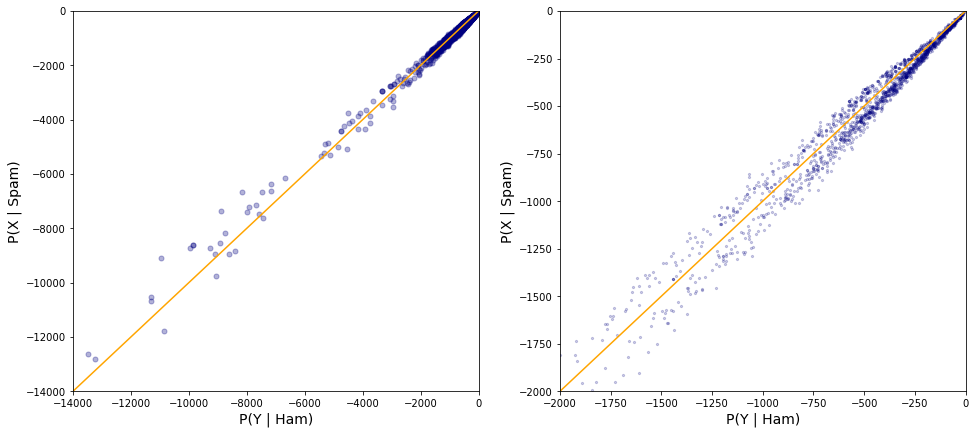

In [57]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha = 0.3, s=25)
plt.plot(linedata, linedata, color="orange")
############################################################
plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color="navy", alpha = 0.2, s=5)
plt.plot(linedata, linedata, color="orange")

plt.show()

In [59]:
sns.set_style("whitegrid")
labels = "Actual Category"

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
 labels: y_test})

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


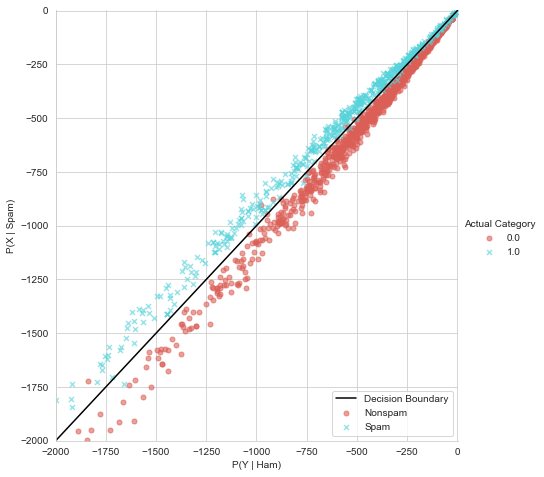

In [77]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg=False,
 scatter_kws={"alpha":0.6, "s": 25}, hue=labels, markers=["o","x"], palette = "hls")

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color="black")

plt.legend(("Decision Boundary","Nonspam","Spam"), loc="lower right",fontsize=10)


##  False Positives and False Negatives

In [78]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1469,  255], dtype=int64))

In [88]:
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

255

In [89]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

0

In [90]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

334

In [91]:
true_neg = (y_test == 0) & (prediction == 0)
true_neg.sum()

1135

## Recall Score

In [94]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print("Recall score is {:.2%}".format(recall_score))

Recall score is 43.29%


## Precision Score

In [95]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print("Precision score is {:.2%}".format(precision_score))

Precision score is 100.00%


## F Score

In [96]:
f_score = 2* precision_score*recall_score /(precision_score + recall_score)
print("F score is {:.2%}".format(f_score))


F score is 60.43%
